In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
import random
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras import layers
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.initializers import glorot_uniform


In [382]:
import splitfolders
input_folder = r'Z:\projects\amm\dataset\CK+48'
output_folder = r'Z:\projects\amm\dataset'
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.1, 0.1))

In [383]:
target_size=(48,48)

In [384]:
np.random.seed(42)
tf.random.set_seed(42)

In [385]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    'Z:\\projects\\amm\\dataset\\train',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    'Z:\\projects\\amm\\dataset\\val',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical')

datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(
    'Z:\\projects\\amm\\dataset\\test',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical')

Found 783 images belonging to 7 classes.
Found 94 images belonging to 7 classes.
Found 104 images belonging to 7 classes.


In [386]:
train_generator.image_shape

(48, 48, 3)

In [387]:
train_generator.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [388]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dropout(rate=0.4),
   tf.keras.layers.Dense(7, activation='softmax')
])

In [389]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [390]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 4, 4, 64)       

In [391]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1)
history = model.fit(train_generator, epochs=80, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/80
13/13 [==============================] - 6s 288ms/step - loss: 1.8608 - accuracy: 0.2273 - val_loss: 1.8183 - val_accuracy: 0.2128
Epoch 2/80
13/13 [==============================] - 1s 79ms/step - loss: 1.8202 - accuracy: 0.2388 - val_loss: 1.7935 - val_accuracy: 0.2553
Epoch 3/80
13/13 [==============================] - 1s 80ms/step - loss: 1.7829 - accuracy: 0.2950 - val_loss: 1.7181 - val_accuracy: 0.3404
Epoch 4/80
13/13 [==============================] - 1s 91ms/step - loss: 1.6886 - accuracy: 0.3908 - val_loss: 1.5065 - val_accuracy: 0.5745
Epoch 5/80
13/13 [==============================] - 1s 86ms/step - loss: 1.4219 - accuracy: 0.5377 - val_loss: 1.1292 - val_accuracy: 0.6277
Epoch 6/80
13/13 [==============================] - 1s 86ms/step - loss: 1.1345 - accuracy: 0.5900 - val_loss: 0.9318 - val_accuracy: 0.6489
Epoch 7/80
13/13 [==============================] - 1s 93ms/step - loss: 0.9851 - accuracy: 0.6322 - val_loss: 0.7725 - val_accuracy: 0.7447
Epoch 8/80
1

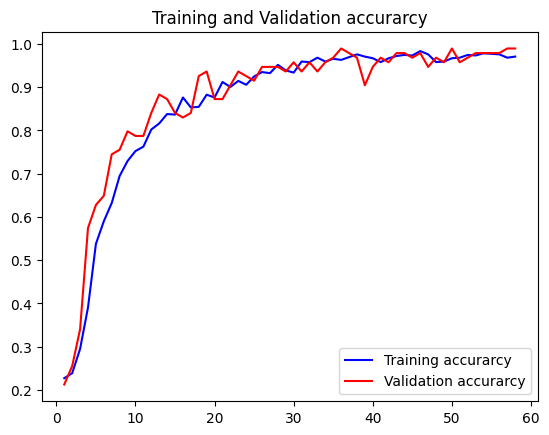

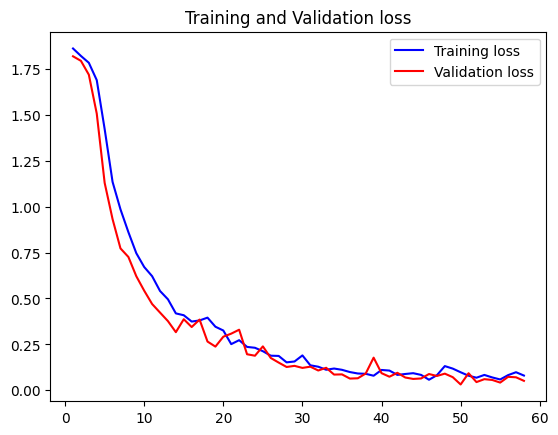

In [392]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure() # to plot new figure
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [393]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

2/2 [==============================] - 0s 65ms/step - loss: 5.9457 - accuracy: 0.9615
Test Accuracy: 0.9615384340286255


In [394]:
model.save("modelfinalll")

INFO:tensorflow:Assets written to: modelfinalll\assets


INFO:tensorflow:Assets written to: modelfinalll\assets


1/1 [==============================] - 0s 86ms/step
Angry: 99.11%
Neutral: 0.00%
Disgust: 0.50%
Fear: 0.00%
Happy: 0.00%
Sad: 0.39%
Surprise: 0.00%


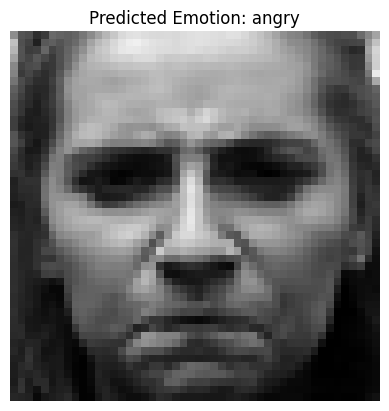

1/1 [==============================] - 0s 21ms/step
Angry: 0.07%
Neutral: 3.28%
Disgust: 0.28%
Fear: 30.29%
Happy: 65.96%
Sad: 0.00%
Surprise: 0.12%


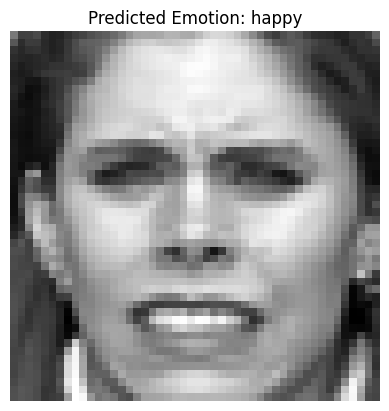

1/1 [==============================] - 0s 21ms/step
Angry: 0.00%
Neutral: 0.00%
Disgust: 0.00%
Fear: 0.00%
Happy: 0.00%
Sad: 0.00%
Surprise: 100.00%


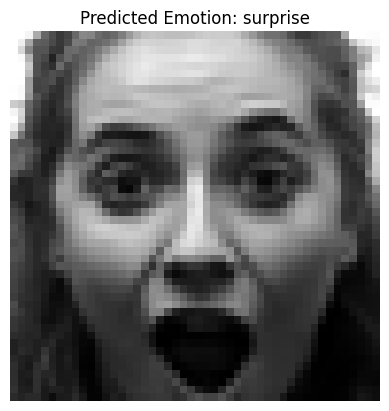

1/1 [==============================] - 0s 22ms/step
Angry: 0.00%
Neutral: 0.00%
Disgust: 0.00%
Fear: 0.00%
Happy: 0.00%
Sad: 100.00%
Surprise: 0.00%


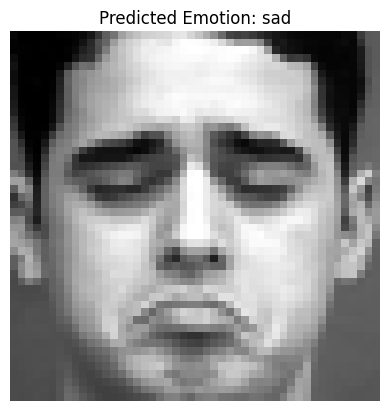

In [395]:
label = ['angry','neutral','disgust','fear','happy','sad','surprise']
def predict_emotion(image_path, model, label):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0 
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    emotion_labels = label
    predicted_emotion = emotion_labels[predicted_class_index]
    for label, score in zip(emotion_labels, predictions[0]):
        print(f"{label.capitalize()}: {score * 100:.2f}%")
    plt.imshow(img, interpolation='nearest')
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

image_paths_to_predict = [
    r'Z:\projects\amm\dataset\test\anger\S014_003_00000028.png',
    r'Z:\projects\amm\dataset\test\fear\S032_004_00000012.png',
    r'Z:\projects\amm\dataset\test\surprise\S014_001_00000027.png',
    r'Z:\projects\amm\dataset\test\sadness\S093_001_00000019.png'
]

for image_path in image_paths_to_predict:
    predict_emotion(image_path, model, label)